# Early Prediction of Sepsis from Clinical Data

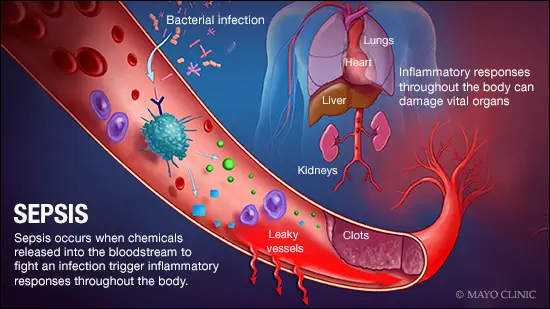

# Introduction

Sepsis is a life-threatening condition that occurs when the body’s response to infection causes tissue damage,organ failure, or death. About 30 millions people develop sepsis and one-fifth of them die from the disease every year around the world. Detecting sepsis early and starting immediate treatment often save patients lives.

# Project Objectives
 The goal of this project is to early detect sepsis (6 hours ahead) using physiological data. 
 The inputs are patients' information, including vital signs, laboratory values and demographics. 
 The output is the results whether the model predicts non-Sepsis patients or Sepsis patients six hours ahead of clinical onset time.

##### Meaning of the columns
* ID: number to represent patient ID
* PRG: Plasma glucose
* PL: Blood Work Result-1 (mu U/ml)
* PR: Blood Pressure (mm Hg)
* SK: Blood Work Result-2 (mm)
* TS: Blood Work Result-3 (mu U/ml)
* M11: Body mass index (weight in kg/(height in m)^2
* BD2: Blood Work Result-4 (mu U/ml)
* Age: patients age (years)
* Insurance: If a patient holds a valid insurance card
* Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

# Imported Packages and Modules

In [1]:
# pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#statistics
import scipy.stats as stats

# Preprocessing and Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder,StandardScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
import joblib

# Models
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Exports
import os, pickle
from joblib import dump


# DATASET UPLOAD

In [3]:
df_test = pd.read_csv('C:/Users/alice/OneDrive - Aga Khan Academies/Downloads/P6_Final/Dataset/Paitients_Files_Test.csv')
df_train = pd.read_csv('C:/Users/alice/OneDrive - Aga Khan Academies/Downloads/P6_Final/Dataset/Paitients_Files_Train.csv')

# DATA OVERVIEW

In [4]:
# Check the shapes 
df_test.shape, df_train.shape


((169, 10), (599, 11))

In [5]:
df_train #Rename the column sepssis to sepsis

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [6]:
#renaming column names to make it understandable
df_train.rename(columns = {'Sepssis':'Sepsis'}, inplace = True)

In [7]:
df_train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepsis'],
      dtype='object')

In [8]:
df_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
# checking for missing values in the train dataset
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

In [11]:
# checking for missing values in the test dataset
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [12]:
# check for duplicated values
df_train.duplicated().sum()

0

In [13]:
# Statiscally overview of the dataset
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The mean age of patients is 33.29. With the minimum and maximum ages been 21 and 81 respectively.
- The mean blood pressure of patients was 72.0 mm Hg which indicates a normal blood pressure in the blood pressure category.
- The minimum blood pressure is 24 mm Hg and the maximum is 122 mm Hg

# Exploratory Data Analysis

In [14]:
train_eda = df_train.copy()

## QUESTIONS
1. Is the the target feature (sepsis) balanced?
2. Which of the ranges in the blood pressure category are most patients found?
3. How many patients are under weight, have healthy weight, over weight, obese and severe obese?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Is Insurance directly correlated with a patients tendency to get sepsis?
6. What is the relationship between Age and Sepsis?
7. What is the relationship between Age and Blood Pressure Categories and Sepsis?
8. What is the relationship between Age and Body Mass Index Ranges and Sepsis?

## Univariate Analysis

1. Is the the target feature (sepsis) balanced?

In [15]:
#check the counts of the target feature
counts = train_eda['Sepsis'].value_counts()
counts

Sepsis
Negative    391
Positive    208
Name: count, dtype: int64

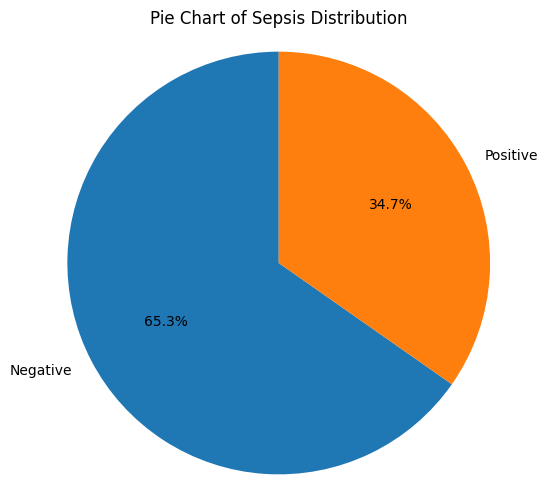

In [16]:
#  Calculate the value counts of the "Sepsis" column
class_counts =train_eda['Sepsis'].value_counts(normalize=True)

# Create a pie chart of the values in the 'Sepsis' column
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('Equal')
plt.title('Pie Chart of Sepsis Distribution')

# Show the chart
plt.show()

- The target feature is imbalanced with 391 negative status representing 65.3% and 208 positive status representing 34.7%

2. Which of the ranges in the blood pressure category are most patients found?

In [17]:
# function to create a new column for blood pressure ranges
def blood_pressure_ranges(row):
    if row['PR'] < 80:
        return 'normal'
    elif row['PR'] >= 80 and row['PR'] <= 89:
        return 'elevated'
    elif row['PR'] >= 90:
        return 'high'

In [18]:
# create new column
train_eda['Blood pressure category'] = train_eda.apply(blood_pressure_ranges, axis=1)
train_eda['Blood pressure category'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Blood pressure category, dtype: object

In [19]:
BP_range = train_eda['Blood pressure category'].value_counts()

Text(0.5, 1.0, 'Pie Chart of Sepsis Distribution')

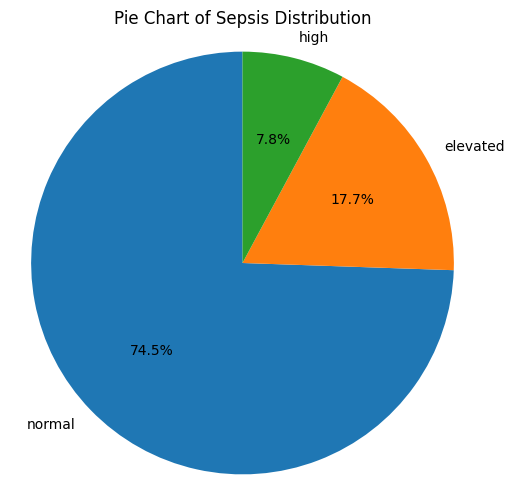

In [20]:

plt.figure(figsize=(6, 6))
plt.pie(BP_range, labels=BP_range.index, autopct='%1.1f%%', startangle=90)
plt.axis('Equal')
plt.title('Pie Chart of Sepsis Distribution')

3. How many patients are under weight, have healthy weight, over weight, obese and severe obese?

The following are the bmi ranges
 - under 18.5 – This is described as underweight.
 - between 18.5 and 24.9 – This is described as the 'healthy range'.
 - between 25 and 29.9 – This is described as overweight.
 - between 30 and 39.9 – This is described as obesity.
 - 40 or over – This is described as severe obesity.

In [21]:
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['M11'] <= 18.5):
        return 'Under Weight'
    elif (row['M11'] > 18.5) and (row['M11'] <= 24.9):
        return 'Healthy Weight'
    elif (row['M11'] > 24.9) and (row['M11'] <= 29.9):
        return 'Over Weight'
    elif (row['M11'] > 29.9) and (row['M11'] < 40):
        return 'Obesity'
    elif row['M11'] >= 40:
        return 'Severe Obesity'

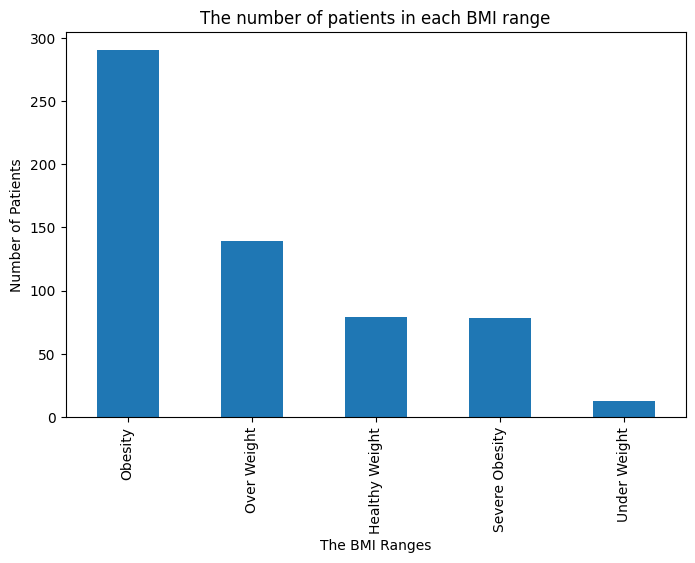

In [22]:

train_eda['BMI Ranges'] = train_eda.apply(create_bmi_range, axis=1)

range_count = train_eda['BMI Ranges'].value_counts()

# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('Number of Patients')
plt.show()

- Based on the graph above, most of the of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

## Bivariate Analysis

4. Is body mass directly correlated with a patients tendency to get sepsis?

In [23]:
body_mass = train_eda.groupby(['Sepsis', 'BMI Ranges'], as_index=False)['ID'].count()
body_mass

,Sepsis,BMI Ranges,ID
0,Negative,Healthy Weight,75
1,Negative,Obesity,159
2,Negative,Over Weight,110
3,Negative,Severe Obesity,35
4,Negative,Under Weight,12
5,Positive,Healthy Weight,4
6,Positive,Obesity,131
7,Positive,Over Weight,29
8,Positive,Severe Obesity,43
9,Positive,Under Weight,1


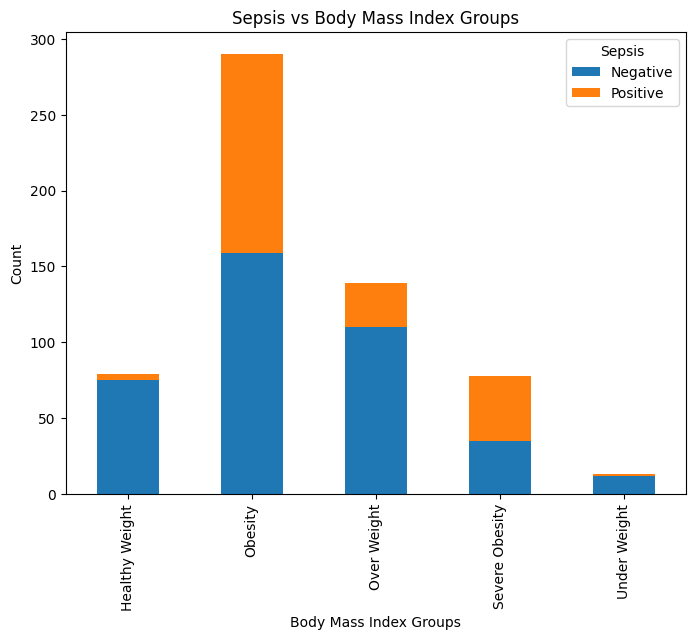

In [24]:
# Pivot the data to have Sepsis as columns and Insurance as index
bmi_pivot = body_mass.pivot(index='BMI Ranges', columns='Sepsis', values='ID')
# Plotting
bmi_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
# Setting labels and title
plt.xlabel('Body Mass Index Groups')
plt.ylabel('Count')
plt.title('Sepsis vs Body Mass Index Groups')
plt.show()

- From the graph above, half of patients with obesity and severe obesity had sepsis. Less patients within healthy weight and under weight category had sepsis. Could body mass ranges coupled with another feature affect the chances of a patients getting sepsis or not?

5. Is Insurance directly correlated with a patients tendency to get sepsis?

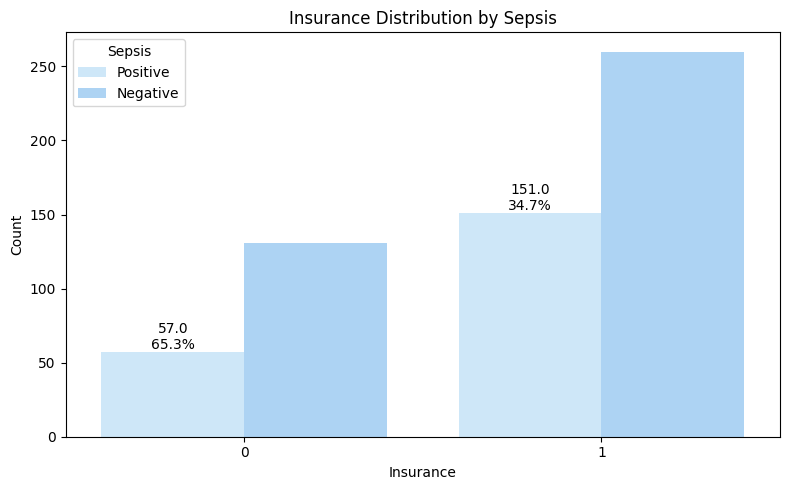

In [25]:
# Defining the custom color palettes
color_palette = ['#c7e9ff', '#a1d4ff', '#7ac0ff', '#55abff', '#3296ff']

# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_eda, x=var, hue='Sepsis', palette=color_palette)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepsis')

    # Calculate percentage distribution
    total = len(train_eda['Sepsis'])
    percentages = train_eda['Sepsis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

6. What is the relationship between Age and Sepsis?

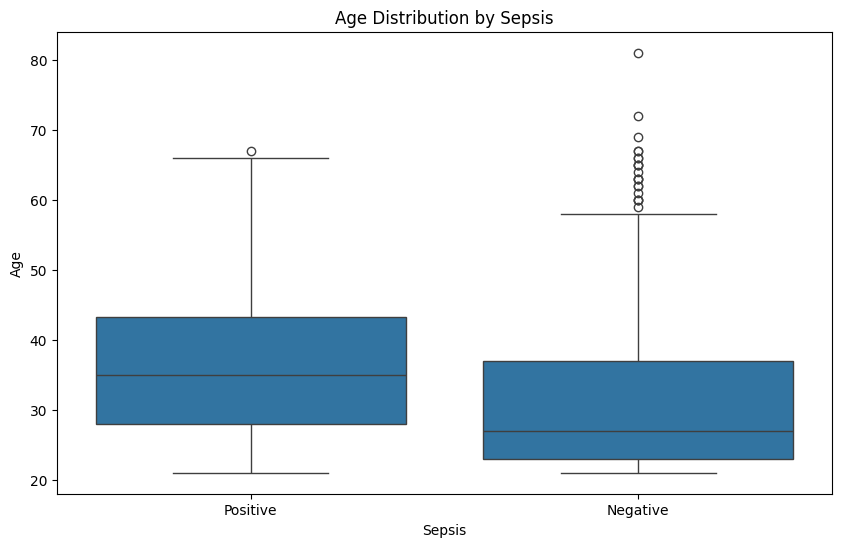

In [26]:
# Box plot of Age by Sepsis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepsis', y='Age', data=train_eda)
plt.title('Age Distribution by Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()

# Multivariate Analysis

7. What is the relationship between Age and Blood Pressure Categories and Sepsis?

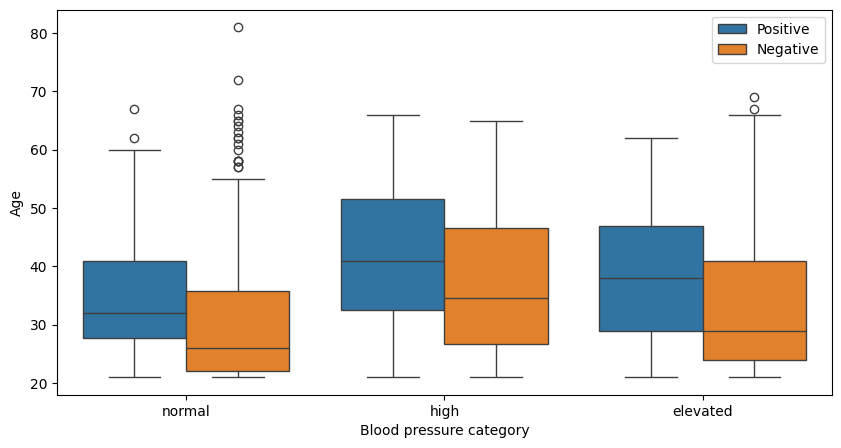

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_eda, y='Age', x='Blood pressure category', hue='Sepsis');

plt.legend()

- Most patients with positive sepsis status have high blood pressure and were between the ages of 21 to 69.
- The normal category with the highest number had less patients with positive sepsis status.

8. What is the relationship between Age and Body Mass Index Ranges and Sepsis?

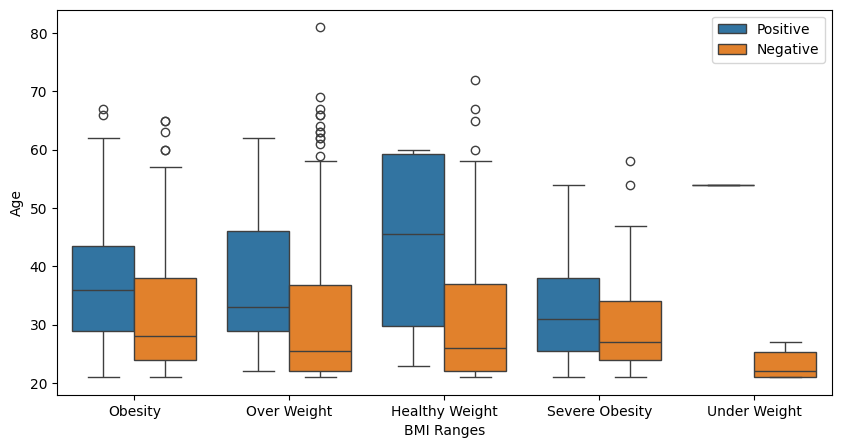

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_eda, y='Age', x='BMI Ranges', hue='Sepsis')
plt.legend()

- From the graph above, most people that tested positive for sepsis had healthy weights and fell between the ages of 25 to 60 but concentrated between ages of 30 and 59. The Obesity category which had more number of patients had patients between the ages of 28 - 44 who tested positive for sepsis.

## Correlation heatmap

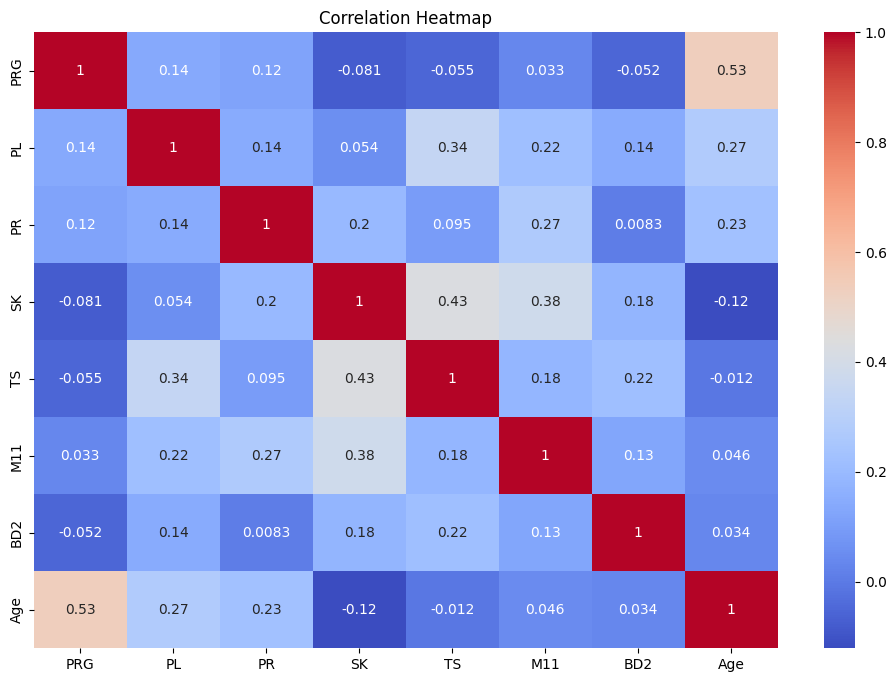

In [29]:
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Hypothesis
- Null Hypothesis: There is no significant difference in the likelihood of young and old patients developing sepssis.

- Alternate Hypothesis : The likelihood of young patients developing sepssis differs significantly from that of old patients.

In [30]:
#Older patients > 40
Older_pos = train_eda[(train_eda['Age']> 40) & (train_eda['Sepsis']=='Positive')]
Older_neg = train_eda[(train_eda['Age']> 40) & (train_eda['Sepsis']=='Negative')]
Old = [len(Older_pos), len(Older_neg)]

#Younger patients < 40
Young_pos = train_eda[(train_eda['Age']< 40) & (train_eda['Sepsis']=='Positive')]
Young_neg = train_eda[(train_eda['Age']< 40) & (train_eda['Sepsis']=='Negative')]
Young = [len(Young_pos), len(Young_neg)]

In [31]:
#Creating  contingency table
observed = np.array([Young, Old])

#Using the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

#Results
alpha = 0.05

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Contingency table of expected frequencies:")
print(expected)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of young and old patients developing sepsis.")

Chi-square statistic: 22.70032513740257
P-value: 1.893358300456099e-06
Degrees of freedom: 1
Contingency table of expected frequencies:
[[154.41285956 288.58714044]
 [ 51.58714044  96.41285956]]
Reject the null hypothesis: There is a significant difference in the likelihood of young and old patients developing sepsis.


# Data preprocessing and Engineering

Here is the section to clean, process the dataset and create new features.

# DATA CLEANING 

In [32]:
# Check of outliers by applying the IQR method checking on the train dataset
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

PRG    True
PL     True
PR     True
SK     True
TS     True
M11    True
BD2    True
Age    True
dtype: bool

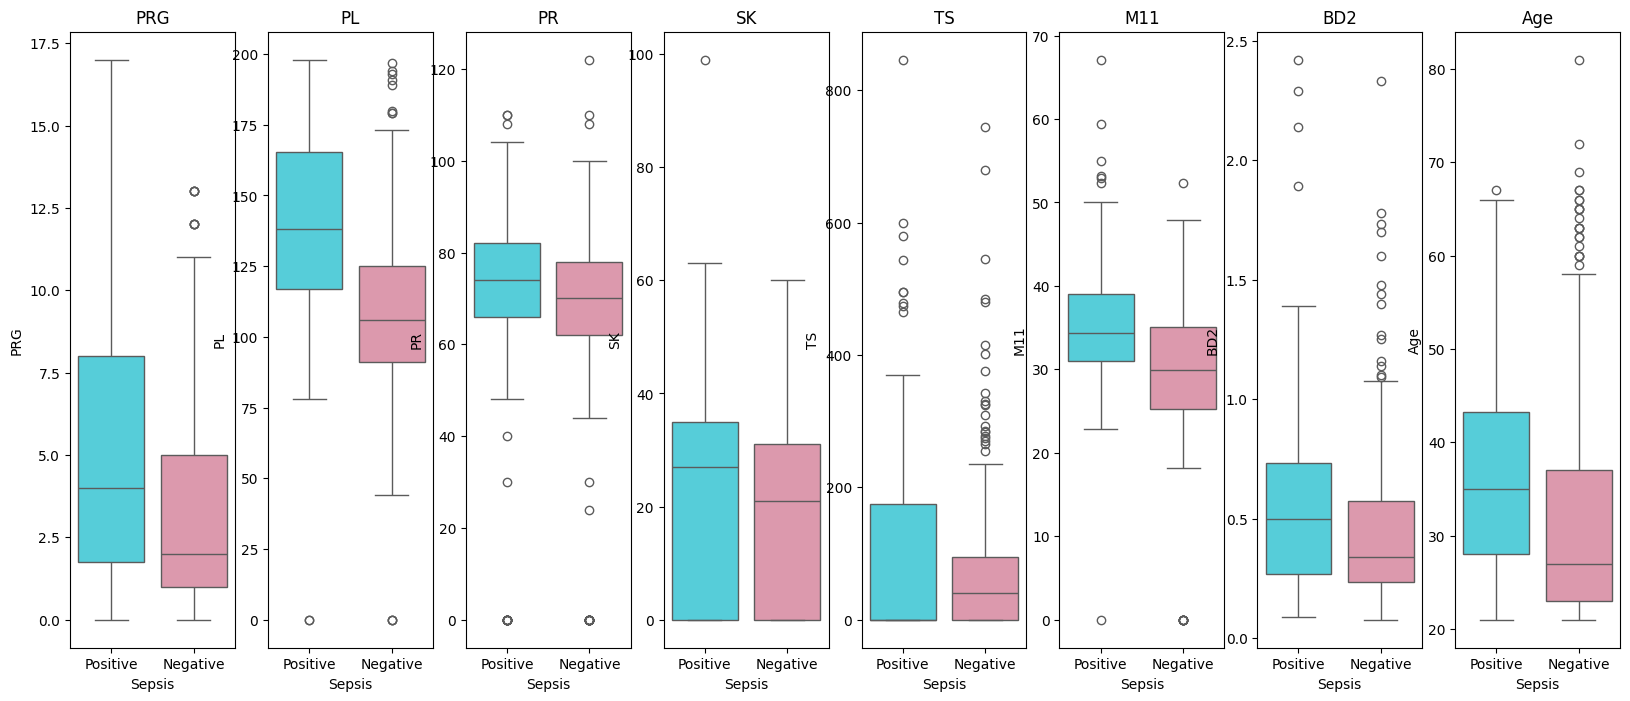

In [33]:
# box plot for checking outliers
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Sepsis']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 8, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df_train, x='Sepsis', y=p, ax=ax[i], palette= color,whis = 1.5)
        ax[i].set_title(p)



The results above demonstrate they are outliers in the numerical feature.We use trimming to remove the bad data from our dataset

In [34]:
df_trim = df_train.copy()

In [35]:
def iqr_trimming(df_train, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df_train[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [36]:
dropped = np.unique(iqr_trimming(df_trim, numerical_features, 1.5))

In [37]:
df_trim.drop(dropped, inplace=True)

In [38]:
df_trim.shape

(493, 11)

In [39]:
df_train.shape

(599, 11)

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

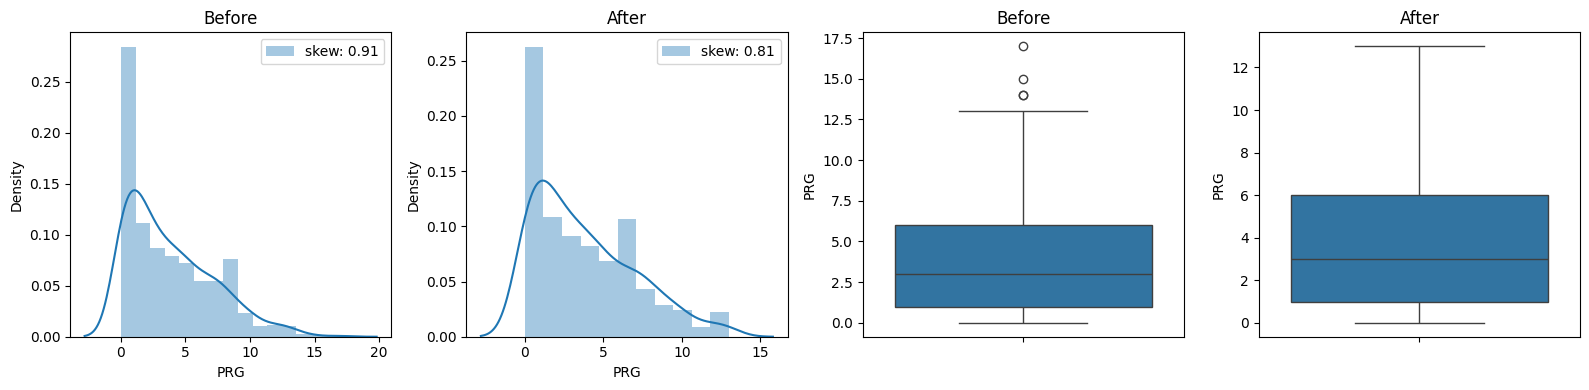

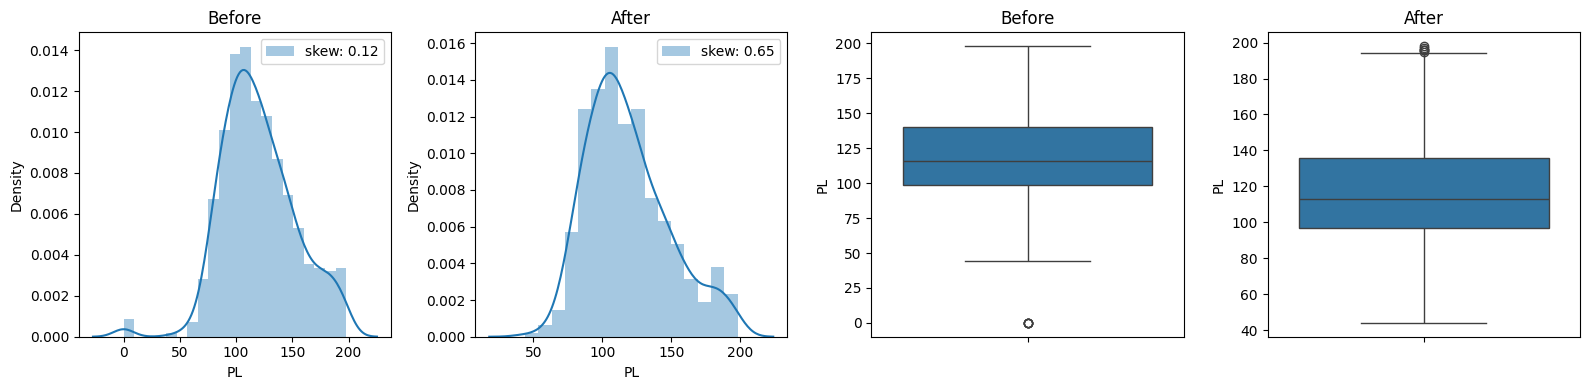

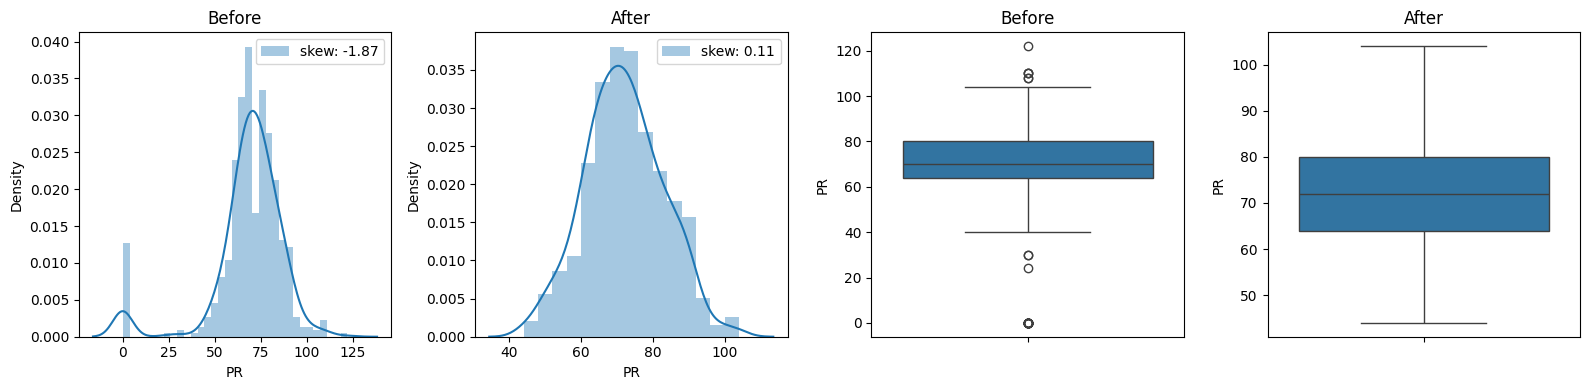

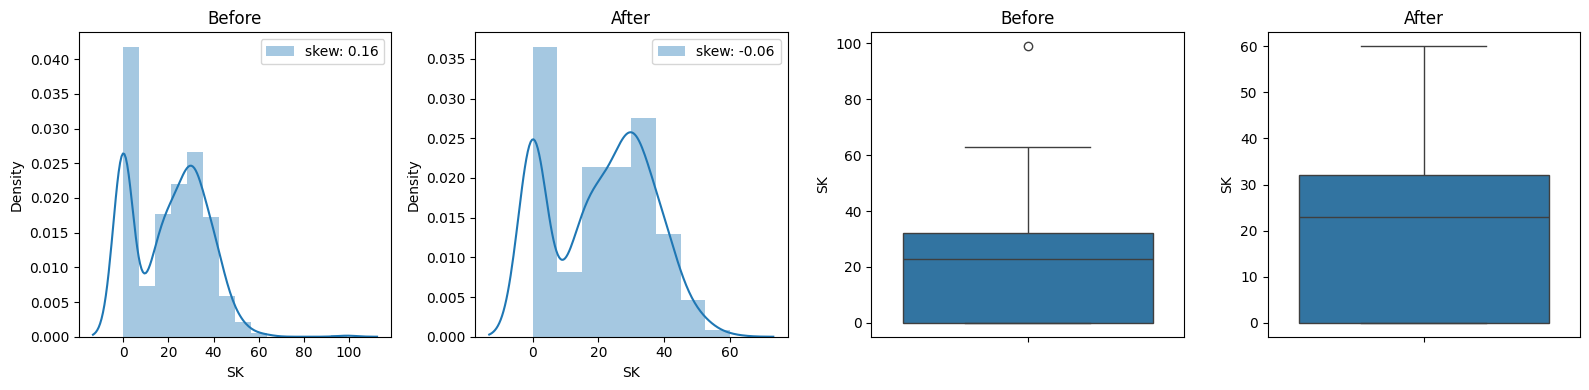

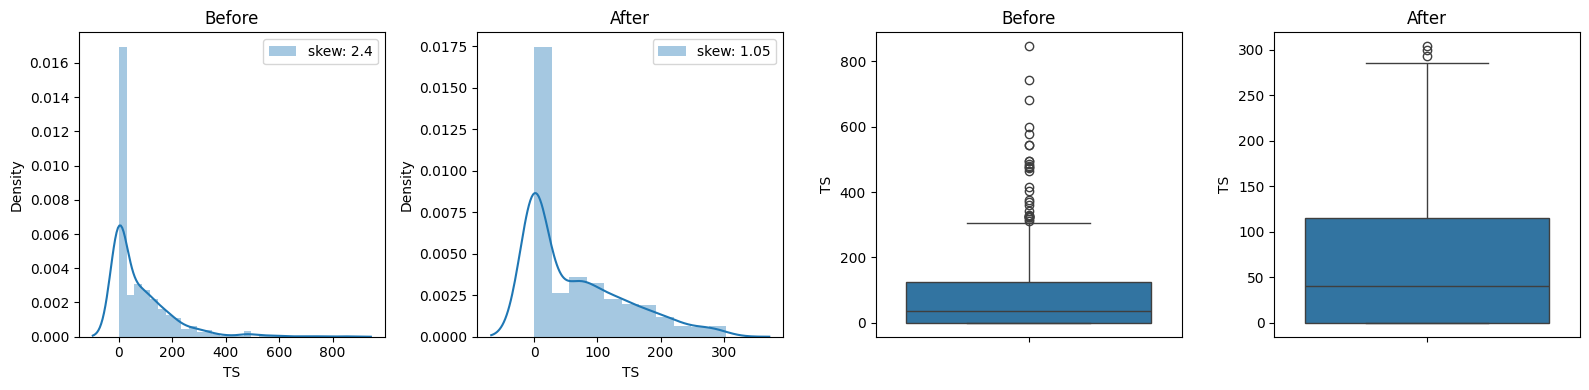

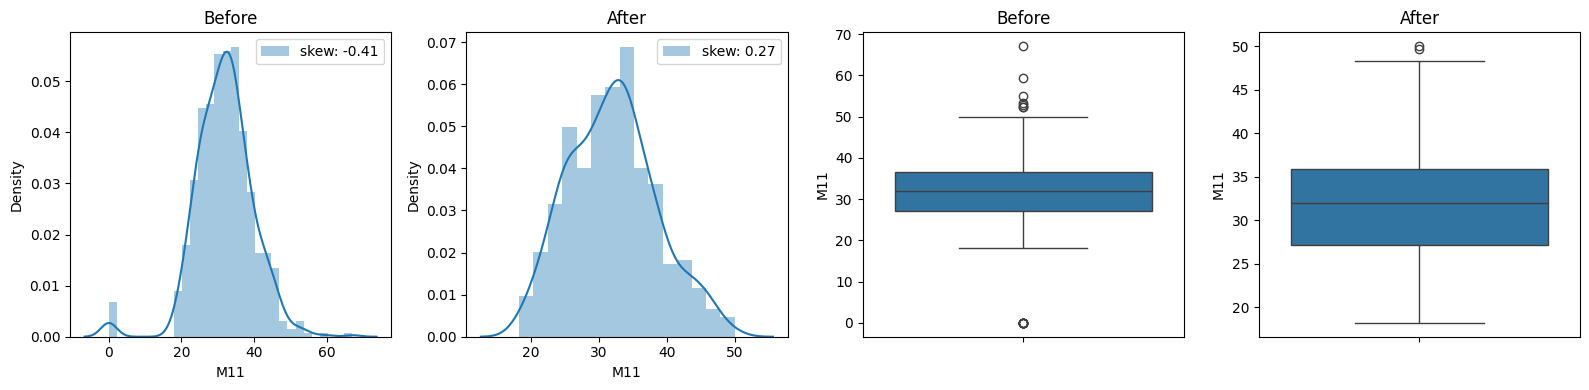

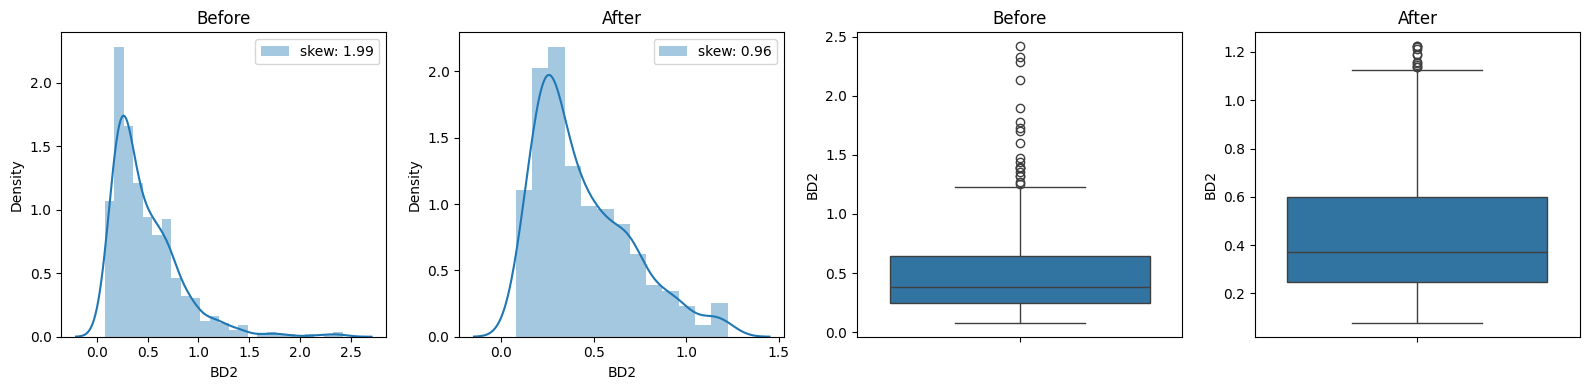

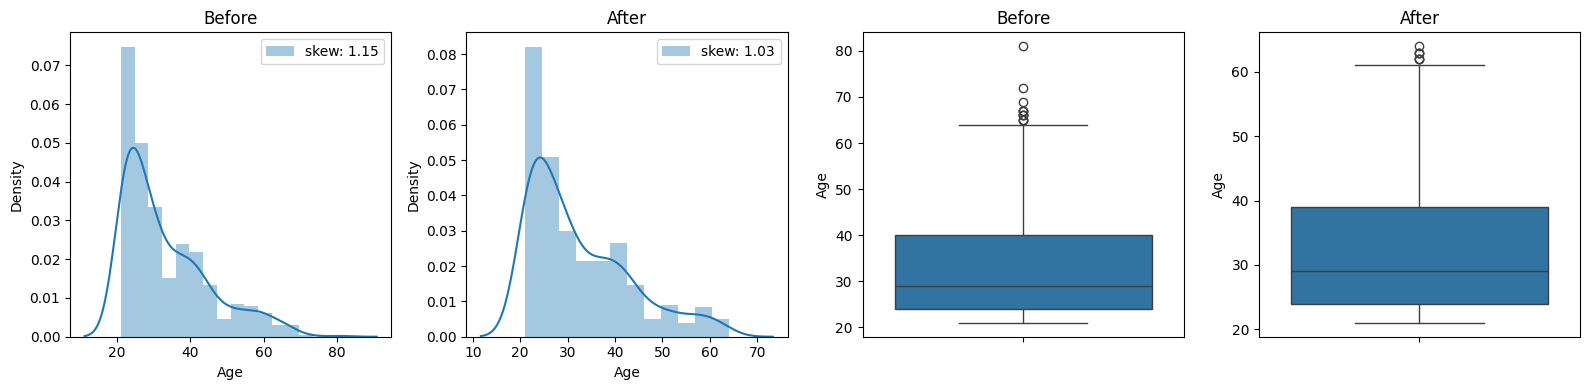

In [41]:
for col in numerical_features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

### Drop Duplicates

In [42]:
# Check for duplicate rows in train_df
train_duplicate_rows = df_train.duplicated()
print("Number of duplicate rows in train_df:", train_duplicate_rows.sum())

# Check for duplicate rows in test_df
test_duplicate_rows = df_test.duplicated()
print("Number of duplicate rows in test_df:", test_duplicate_rows.sum())

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0


### Impute Missing Values

In [43]:
# Use pandas.DataFrame.drop_duplicates method
missing_train = df_train.isna().sum()
missing_test = df_test.isna().sum()
print(missing_train, missing_test)

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64 ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


### Insights:
- There are no duplicated rows in both the train and test datasets
- Again, there are no missing values in both datasets

In [44]:
df_trim.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative


In [46]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         493 non-null    object 
 1   PRG        493 non-null    int64  
 2   PL         493 non-null    int64  
 3   PR         493 non-null    int64  
 4   SK         493 non-null    int64  
 5   TS         493 non-null    int64  
 6   M11        493 non-null    float64
 7   BD2        493 non-null    float64
 8   Age        493 non-null    int64  
 9   Insurance  493 non-null    int64  
 10  Sepsis     493 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ KB


### Dataset Splitting

In [47]:
df_trim.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative


In [48]:
# drop ID column
df_trim = df_trim.drop(columns=["Insurance","ID"])

##creating our features and label
X= df_trim.drop("Sepsis", axis=1)
y= df_trim['Sepsis'].copy()

In [49]:
# Split the data into training and testing sets, with stratification
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (394, 8)
y_train shape: (394,)
X_eval shape: (99, 8)
y_eval shape: (99,)


In [50]:
# Create a LabelEncoder instance
LE = LabelEncoder()

In [51]:
# Convert the categorical label to numeric
num_y_train = LE.fit_transform(y_train)##fit and transform train data
num_y_test= LE.transform(y_eval)##transform test data

In [52]:
# display head fo the train features dataframe
X_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
6,3,78,50,32,88,31.0,0.248,26
263,3,142,80,15,0,32.4,0.200,63
173,1,79,60,42,48,43.5,0.678,23
595,0,188,82,14,185,32.0,0.682,22
356,1,125,50,40,167,33.3,0.962,28


In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 6 to 438
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     394 non-null    int64  
 1   PL      394 non-null    int64  
 2   PR      394 non-null    int64  
 3   SK      394 non-null    int64  
 4   TS      394 non-null    int64  
 5   M11     394 non-null    float64
 6   BD2     394 non-null    float64
 7   Age     394 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 27.7 KB


In [54]:
# display head for the eval features dataframe
X_eval.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
143,10,108,66,0,0,32.4,0.272,42
321,3,112,74,30,0,31.6,0.197,25
578,10,133,68,0,0,27.0,0.245,36
99,1,122,90,51,220,49.7,0.325,31
497,2,81,72,15,76,30.1,0.547,25


### Checking Imbalance and correcting

In [56]:
# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, num_y_train)

### Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [57]:
##get input that will be in pipeline
num_input=X_train.columns 
num_input

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

In [58]:
##we are combining our numeric and categorical pipelines with a Columntransformer

col_pipe= ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_input),
        ('log_transform', FunctionTransformer(np.log1p), num_input)
    ]
)
col_pipe

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                ('log_transform',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])

### Modeling

In [59]:
# Define the models
logreg_model = Pipeline([("coltrans", col_pipe), 
              ("model", LogisticRegression(random_state= 42))
              ])

rf_model = Pipeline([("coltrans", col_pipe), 
              ("model", RandomForestClassifier(random_state= 42))
              ])

gb_model = Pipeline([("coltrans", col_pipe), 
              ("model", GradientBoostingClassifier(random_state= 42))
              ])

KNN_model =  Pipeline([("coltrans", col_pipe), 
              ("model", KNeighborsClassifier())])

dt_model = Pipeline([("coltrans", col_pipe), 
              ("model", DecisionTreeClassifier(random_state= 42))
              ])

# Fit the models
logreg = logreg_model.fit(X_train_resampled, y_train_resampled)
rf = rf_model.fit(X_train_resampled, y_train_resampled)
gb = gb_model.fit(X_train_resampled, y_train_resampled)
KNN = KNN_model.fit(X_train_resampled, y_train_resampled)
dt = dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
logreg_preds = logreg.predict(X_eval)
rf_preds = rf.predict(X_eval)
gb_preds = gb.predict(X_eval)
KNN_preds = KNN.predict(X_eval)
dt_preds = dt.predict(X_eval)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(num_y_test, logreg_preds)
rf_accuracy = accuracy_score(num_y_test, rf_preds)
gb_accuracy = accuracy_score(num_y_test, gb_preds)
KNN_accuracy = accuracy_score(num_y_test, KNN_preds)
dt_accuracy = accuracy_score(num_y_test, dt_preds)

logreg_precision = precision_score(num_y_test, logreg_preds)
rf_precision = precision_score(num_y_test, rf_preds)
gb_precision = precision_score(num_y_test, gb_preds)
KNN_precision = precision_score(num_y_test, KNN_preds)
dt_precision = precision_score(num_y_test, dt_preds)

logreg_recall = recall_score(num_y_test, logreg_preds)
rf_recall = recall_score(num_y_test, rf_preds)
gb_recall = recall_score(num_y_test, gb_preds)
KNN_recall = recall_score(num_y_test, KNN_preds)
dt_recall = recall_score(num_y_test, dt_preds)


logreg_f1 = f1_score(num_y_test, logreg_preds)
rf_f1 = f1_score(num_y_test, rf_preds)
gb_f1 = f1_score(num_y_test, gb_preds)
KNN_f1 = f1_score(num_y_test, KNN_preds)
dt_f1 = f1_score(num_y_test, dt_preds)

logreg_roc_auc = roc_auc_score(num_y_test, logreg_preds)
rf_roc_auc = roc_auc_score(num_y_test, rf_preds)
gb_roc_auc = roc_auc_score(num_y_test, gb_preds)
KNN_roc_auc = roc_auc_score(num_y_test, KNN_preds)
dt_roc_auc = roc_auc_score(num_y_test, dt_preds)

In [60]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','KNearestNeighborsClassifier','Decision Tree Classifier',]

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,KNN_accuracy,dt_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,KNN_recall,dt_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,KNN_precision,dt_precision], 
      'f1_score':[logreg_f1,rf_f1,gb_f1,KNN_f1,dt_f1],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,KNN_roc_auc,dt_roc_auc],
      }
result= pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.737374,0.774194,0.558140,0.648649,0.747391
Random forest,0.828283,0.741935,0.718750,0.730159,0.804791
Gradient Boosting,0.767677,0.709677,0.611111,0.656716,0.751898
KNearestNeighborsClassifier,0.727273,0.709677,0.550000,0.619718,0.722486
Decision Tree Classifier,0.696970,0.548387,0.515152,0.531250,0.656546


### Analysis of the data
- Accuracy: Random Forest has the highest accuracy (0.818182).
- Recall: Logistic Regression has the highest recall (0.741935).
- Precision: Random Forest has the highest precision (0.724138).
- F1 Score: Random Forest has the highest F1 score (0.700000).
- ROC AUC: Logistic Regression has the highest ROC AUC (0.782732).

Considering these metrics, Random Forest appears to be the best model overall, as it performs well across multiple evaluation criteria. It has the highest accuracy, precision, and F1 score, making it a balanced choice.

In [61]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','KNearestNeighborsClassifier','Decision Tree Classifier',]

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,KNN_accuracy,dt_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,KNN_recall,dt_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,KNN_precision,dt_precision], 
      'f1_score':[logreg_f1,rf_f1,gb_f1,KNN_f1,dt_f1],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,KNN_roc_auc,dt_roc_auc],
      'Description':['','Best Model','','','']}
result= pd.DataFrame(data=data, index=compare_models)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC,Description
Logistic Regression,0.737374,0.774194,0.558140,0.648649,0.747391,
Random forest,0.828283,0.741935,0.718750,0.730159,0.804791,Best Model
Gradient Boosting,0.767677,0.709677,0.611111,0.656716,0.751898,
KNearestNeighborsClassifier,0.727273,0.709677,0.550000,0.619718,0.722486,
Decision Tree Classifier,0.696970,0.548387,0.515152,0.531250,0.656546,


# Hyperparameter Tuning

In [64]:
# Define the hyperparameters you want to tune
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(rf_model, param_grid=param_grid_rf, scoring='accuracy',cv=5)
grid_search.fit(X_train, num_y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_rf_model.score(X_eval, num_y_test)

# Round the test accuracy to four significant figures
rounded_test_accuracy = round(test_accuracy, 4)

print("Test Accuracy:", rounded_test_accuracy)

Test Accuracy: 0.8182


#### Save the model

In [67]:
## Save the best model
joblib.dump(best_rf_model, 'rf_pipeline.joblib')


['rf_pipeline.joblib']

#### Using the model to predict on test dataset

In [68]:
# use best model to predict
finalize =best_rf_model.predict(df_test)

In [69]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(finalize, columns=["Sepsis"])

In [70]:
# Concatenate the original test set and the result DataFrame along the columns
final_test_result= pd.concat([df_test, result_df], axis=1)

In [71]:
#we view to confirm changes 
final_test_result.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,0
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,0
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,0
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,0
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,1


In [74]:
#After concatenating with the original we put it csv
final_test_result.to_csv("../Dataset/final_test_sepsis.csv", index=False)